<a href="https://colab.research.google.com/github/soleildayana/Planetary-Sciences/blob/main/Cratermaker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de Cráteres de Impacto
 Ciencias Planetarias - 2025-1
 Autores: Soleil Niño, Sofía Casallas



## **1). Radio y Profundidad del cráter vs. Ángulo y Velocidad del Proyectil**
Simular con la librería `cratermaker` cómo varían el **radio** y la **profundidad** de un cráter con respecto al **ángulo** y la **velocidad** del impacto.



CraterMaker [1] es una herramienta de código abierto desarrollada en Python que permite estimar las dimensiones de cráteres de impacto planetarios a partir de parámetros como el tamaño, velocidad, densidad y ángulo del impactor, así como la gravedad y densidad del cuerpo impactado. Utiliza leyes de escalado basadas en modelos físicos y empíricos (como los de Holsapple y Housen) para calcular el diámetro, profundidad y volumen del cráter resultante, tanto en el régimen de excavación como de transición (simple o complejo).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from cratermaker import Crater, Morphology


A partir del código compartido por el profesor, que simula el impacto y calcula propiedades como el radio y el diámetro final del cráter, se analizaron ocho ángulos de impacto, igualmente espaciados entre 10° y 80°, así como ocho velocidades comprendidas entre 5000 y 30000 m/s. Esto permitió visualizar las variaciones en los resultados generadas por los diferentes valores de entrada.

In [ ]:
def simular_crater(angulo, velocidad, diam_proy=100, densidad=3000):
    crater = Crater.maker(
        projectile_diameter=diam_proy,
        projectile_velocity=velocidad,
        projectile_angle=angulo,
        projectile_density=densidad
    )
    radio = crater.final_radius
    profundidad = 0.2 * crater.final_diameter  # estimación empírica
    return radio, profundidad, crater


In [ ]:
angulos = np.linspace(10, 80, 8)  # grados
velocidades = np.linspace(5000, 30000, 8)  # m/s

resultados = []

for ang in angulos:
    for vel in velocidades:
        r, d, _ = simular_crater(ang, vel)
        resultados.append((ang, vel, r, d))

resultados = np.array(resultados)


### Radio vs. Profundidad - Gráficas

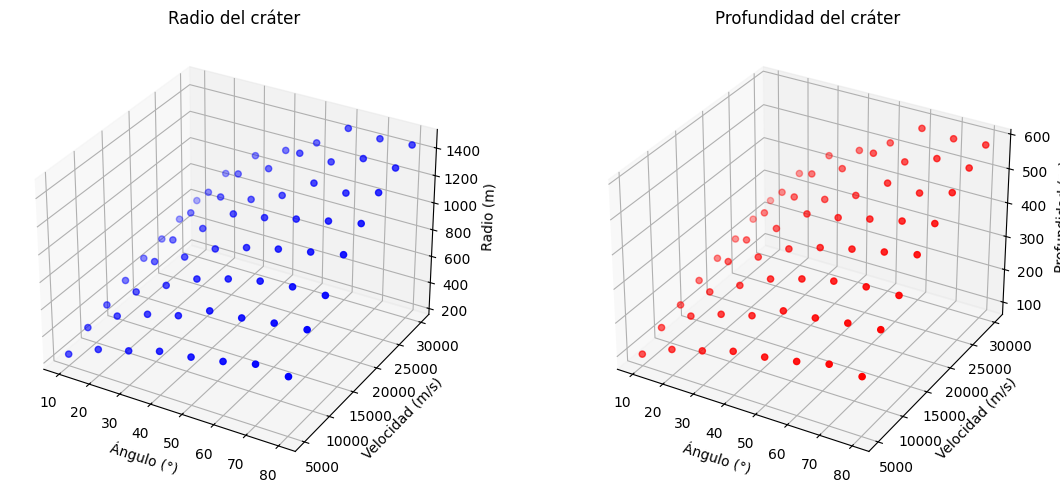

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(resultados[:, 0], resultados[:, 1], resultados[:, 2], c='b')
ax1.set_xlabel('Ángulo (°)')
ax1.set_ylabel('Velocidad (m/s)')
ax1.set_zlabel('Radio (m)')
ax1.set_title('Radio del cráter')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(resultados[:, 0], resultados[:, 1], resultados[:, 3], c='r')
ax2.set_xlabel('Ángulo (°)')
ax2.set_ylabel('Velocidad (m/s)')
ax2.set_zlabel('Profundidad (m)')
ax2.set_title('Profundidad del cráter')

plt.tight_layout()
plt.show()


## **2). Comparaciones**
Comparar los resultados obtenidos con la **teoría de formación de cráteres** mediante fórmulas empíricas.

Ahora, no solo se variarán los valores de ángulo de impacto y velocidad, sino que también se analizará la variación de las **dimensiones del cráter** en función del diámetro del proyectil. En este caso, para contrastar con el montaje experimental [2], se considerarán diámetros de 15 y 25 metros.

Inicialmente se considera una densidad del impactor de $3000 kg/m^3$, el cual es un valor típico para cuerpos rocosos y se utilizan los valores de ángulos y velocidades que se consideraron inicialmente.

In [ ]:
# Parámetros
densidad = 3000  #kg/m^3
angulo= np.linspace(10, 80, 8)  #grados
velocidad= np.linspace(5000, 30000, 8)  #m/s
diametros=[25, 15]  #metros


Para la simulación del crater se usara el cálculo de la profundidad estimada como $$profundidad = k \times radio$$ con $k=0.25$, valor que se obtiene por una relación que se observa comúnmente, donde la profundidad suele ser entre el 20% y 30% del radio

In [ ]:
resultados = {}
k = 0.25

for d in diametros:
    radios = []
    profundidades = []
    for ang in angulo:
        for v in velocidad:
            crater = Crater.maker(
                projectile_diameter=d,
                projectile_velocity=v,
                projectile_angle=ang,
                projectile_density=densidad
            )
            radio = crater.final_radius
            profundidad = k * radio
            radios.append(radio)
            profundidades.append(profundidad)
    resultados[d] = {
        'radios': np.array(radios).reshape(len(angulo), len(velocidad)),
        'profundidades': np.array(profundidades).reshape(len(angulo), len(velocidad)),
    }


Para analizar los resultados se utilizan mapas de calor que compara la Velocidad vs Ángulo de impacto  

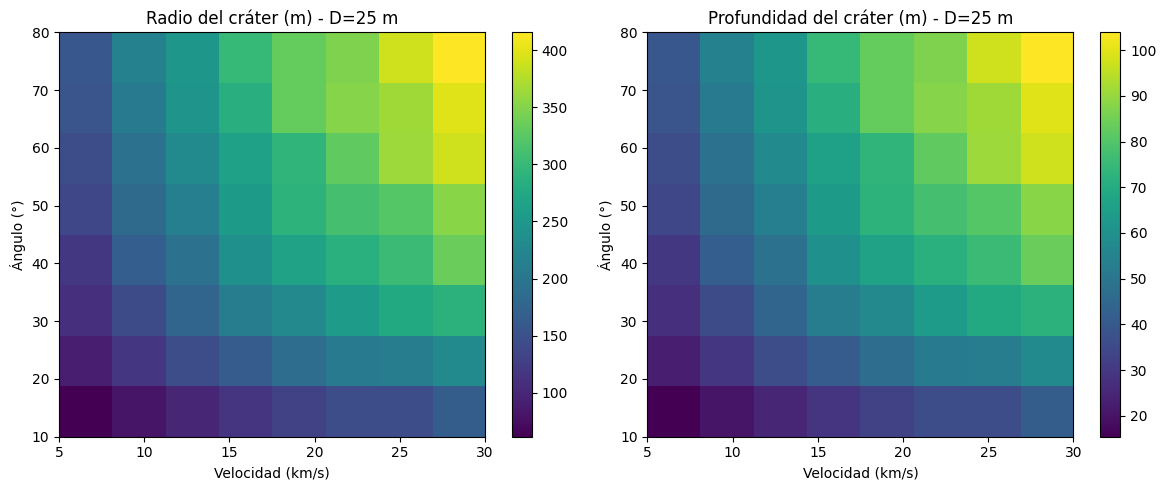

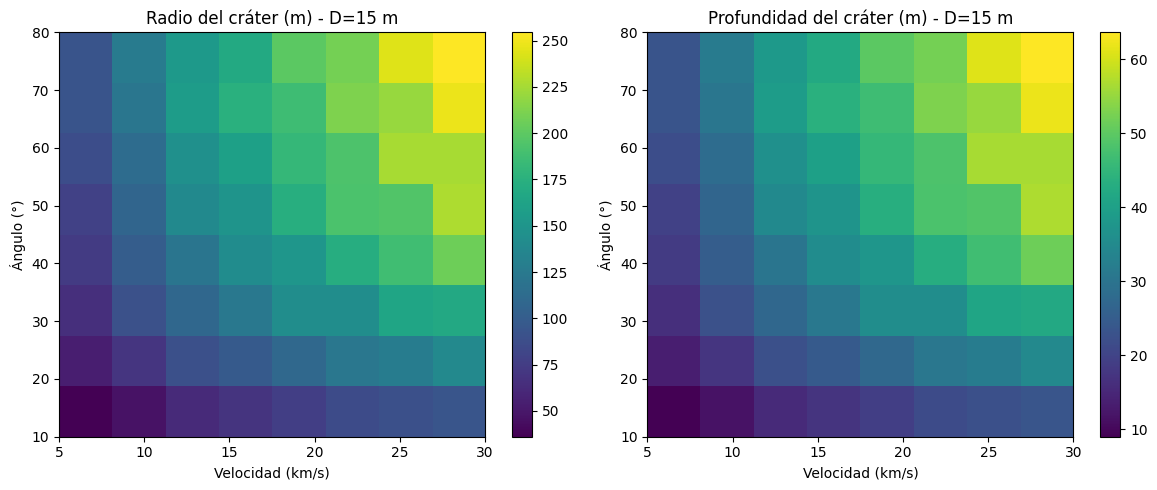

In [ ]:
#Gráfica en función del diámetro del proyectil

for d in diametros:
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    im1 = axs[0].imshow(resultados[d]['radios'], extent=[velocidad[0]/1000, velocidad[-1]/1000, angulo[0], angulo[-1]], aspect='auto', origin='lower')
    axs[0].set_title(f'Radio del cráter (m) - D={d} m')
    axs[0].set_xlabel('Velocidad (km/s)')
    axs[0].set_ylabel('Ángulo (°)')
    plt.colorbar(im1, ax=axs[0])

    im2 = axs[1].imshow(resultados[d]['profundidades'], extent=[velocidad[0]/1000, velocidad[-1]/1000, angulo[0], angulo[-1]], aspect='auto', origin='lower')
    axs[1].set_title(f'Profundidad del cráter (m) - D={d} m')
    axs[1].set_xlabel('Velocidad (km/s)')
    axs[1].set_ylabel('Ángulo (°)')
    plt.colorbar(im2, ax=axs[1])

    plt.tight_layout()



Los gráficos superiores son correspondientes al proyectil de 25 metros de diámetro, en estos se observa que tanto el radio como la profundidad del cráter aumentan progresivamente con la velocidad del impacto. Este comportamiento es coherente con la relación física de la energía cinética,puesto que al analizar la energía cinética del impacto, que está dada por la expresión $$E_k = \frac{1}{2}mv^2$$ se indica que un pequeño aumento en la velocidad produce un incremento cuadrático en la energía, lo que implica obtener cráteres más grandes, es decir, con mayor **profundidad**, obteniendo cráteres más grandes y profundos.

Asimismo, el ángulo refleja los datos esperados donde impactos más cercanos a los 90° generan cráteres más profundos y con mayor radio, mientras que ángulos bajos 20°–40°, poco profundos y menores en tamaño.

Según Holsapple [5], la formación y morfología de los cráteres de impacto puede describirse mediante leyes de escala que dependen de la energía, el ángulo y el tamaño del proyectil, de la siguiente forma se describe así el radio y la profundidad del cráter:
* Radio del cráter:
$$R(\theta) \propto R_{90^\circ} \cdot (\sin \theta)^{1/3}$$
* Profundidad del cráter:
$$D(\theta) \propto D_{90^\circ} \cdot (\sin \theta)^{1/3}$$

Donde:
* $R$ y $D$ son los valores del radio y profundidad respectivamente en función del ángulo.
* $ R_{90^\circ}$ y $D_{90^\circ}$ son las dimensiones para el impacto vertical
* $\theta$ es el ángulo de impacto con respecto a la horizontal

Además, la energía que se transmite al suelo en un impacto depende del ángulo de impacto del proyectil, esto se describe:


Para hallar esta proporción se considera que no siempre que ocurre un impacto este es perpendicular, así que cuando el impactor entra con un **ángulo oblicuo** solo la componente vertical de su energía impacta diretamente con la superficie puesto que es la que realmente empuja el suelo y excava el cráter, es decir:

$$v_y = v \cdot sin \theta$$

Así la energía asociada a esta velocidad es de:

$$E_y = \frac{1}{2}m(v \cdot sin \theta)^2 = E_{\text{total}} \cdot (\sin \theta)^2 $$

A partir de muchos experimentos se ha descubierto según (Schultz y Gault, 1990 [3]) que la relación con el $\sin(\theta)^2$ varía según la morfología del proyectil y usualmente la relación tiende a ser más cercana a una dependencia lineal, por lo que se concluye que la energía final que se transimte al suelo es:

$$E \propto E_{\text{total}} \cdot \sin \theta$$

A partir de esta expresión se pueden deducir las anteriores correspondientes al **radio** y **profundidad** del cráter, donde el volumen del cráter es proporcional a la energía entregada, tal que $V \propto R^2D \propto E$ y asumiendo que el radio y la profundidad escalan de forma similar con la energía se tiene así una relación ente estos valores con la longitud:

$$R \sim D \sim L $$

Y como el $V \propto L^3 \propto E$, se obtiene finalmente la relación:

$$R \propto E^{1/3}$$
$$D \propto E^{1/3}$$

Reemplazando la ecuación de la energía y teniendo en cuenta que la $E_{\text{total}}$ está asociada a un $\theta = 90°$ se obtiene así:

$$R(\theta) \propto (E_{\text{total}} \cdot \sin \theta)^{1/3} \propto R_{90^\circ} \cdot (\sin \theta)^{1/3}$$

$$D(\theta) \propto (E_{\text{total}} \cdot \sin \theta) ^{1/3}\propto D_{90^\circ} \cdot (\sin \theta)^{1/3}$$

Al comparar los dos tamaños de proyectil de 25 y 15 metros, gráficos superiores e inferiores respectivamente, se evidencia que el tamaño del proyectil tiene una influencia directa en las dimensiones del cráter, para describir esto, se parte inicialmente de la energía cinética nuevamente y considerando al proyectil como una esfera, se describe la masa como $m= \rho \cdot V$, usando como volumen:
$$V = \frac{4}{3} \pi \left( \frac{D}{2} \right)^3 = \frac{\pi}{6} D^3$$

Reemplazando en la masa:
$$m = \rho \cdot V = \rho \cdot \frac{\pi}{6} D^3$$

Sustituyendo esto en la fórmula de energía:

$$E = \frac{1}{2} \cdot \left( \rho \cdot \frac{\pi}{6} D^3 \right) \cdot v^2$$
$$E =  \frac{\rho \pi}{12} D^3 v^2$$

La energía del impacto es proporcional al **cubo del diámetro** del proyectil:

$$E \propto D^3 \cdot v^2$$

lo que concuerda con lo obtenido en las gráficas, donde el proyectil más grande genera cráteres mayores en radio y en profundidad, puesto que transfiere más energía al suelo porque su masa es mayor.

La teoría empírica de cráteres sugiere una relación del tipo:

$$R_{teo} \propto D_p^{0.78} \cdot v^{0.44} \cdot \sin^{1/3}(\theta)$$
$$D_{teo} = k \cdot R_{teo}$$

Donde:
* $D_p$: diámetro del proyectil.
* $R_{teo}$ y $D_{teo}$: Radio y profundidad teóricos.
* $v$: velocidad.
* $\theta$: ángulo de impacto.

este es un modelo semianalítico obtenido de ajustes empíricos en estudios de impactos. A partir de los resulatado obtenidos en la simulación anterior, guardados en las variables de ['radios']  y ['profundidades'], se extraerán para hacer la comparación en base a las fórmulas anteriores. Solo se considerará el diámetro del proyectil de 25 metros.


In [ ]:
#Teoría empírica de cráteres
def radio_teorico(Dp, v, theta):
    return Dp**0.78 * v**0.44 * np.sin(np.radians(theta))**(1/3)

def profundidad_teorica(Dp, v, theta, k=0.25):
    R_teo = Dp**0.78 * v**0.44 * np.sin(np.radians(theta))**(1/3)
    return k * R_teo

diam = 25 #metros

In [ ]:
#Extraer datos de la simulación
r_simulado = resultados[diam]['radios']
prof_simulada = resultados[diam]['profundidades']

#Calcular los valores teóricos
r_teoria = np.array([
    [radio_teorico(diam, v, theta) for v in velocidad]
    for theta in angulo
])
prof_teoria = np.array([
    [profundidad_teorica(diam, v, theta) for v in velocidad]
    for theta in angulo
])

# Simulación vs. Teoría
En ambas gráficas la teoría se representa con las lineas rojas y la simulación fue la obtenida anteriormente.

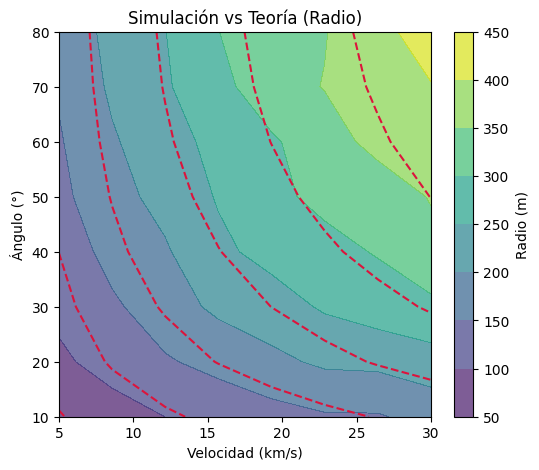

In [ ]:
#Comparación radio
plt.figure(figsize=(6, 5))
cf = plt.contourf(velocidad/1000, angulo, r_simulado, cmap="viridis", alpha=0.7)
plt.contour(velocidad/1000, angulo, r_teoria,colors='crimson', linestyles='--')
plt.title("Simulación vs Teoría (Radio)")
plt.xlabel("Velocidad (km/s)")
plt.ylabel("Ángulo (°)")
plt.colorbar(cf, label="Radio (m)")
plt.show()

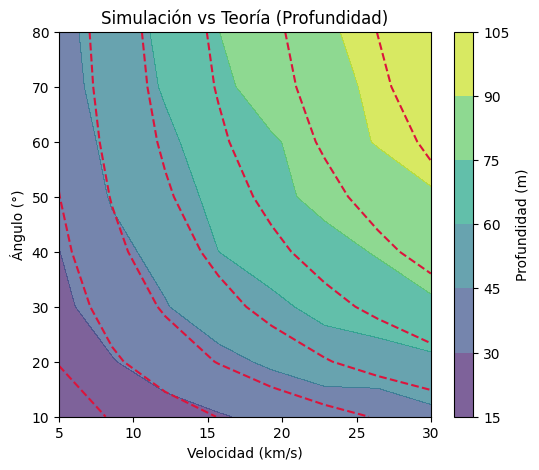

In [ ]:
#Comparación profundidad
plt.figure(figsize=(6, 5))
cf2 = plt.contourf(velocidad/1000, angulo, prof_simulada, cmap="viridis", alpha=0.7)
plt.contour(velocidad/1000, angulo, prof_teoria, colors='crimson', linestyles='--')
plt.title("Simulación vs Teoría (Profundidad)")
plt.xlabel("Velocidad (km/s)")
plt.ylabel("Ángulo (°)")
plt.colorbar(cf2, label="Profundidad (m)")
plt.show()


## **3) Morfología**
Hacer un gráfico de la **morfología** del cráter.

### **Topografía empleando simplemoon**

Tomando como referencia los ejemplos de la sección de ejemplos de morfología [3] se creará el perfil del cráter y eyección de uno de los diámetros tomados previamente (25 metros), usando el modelo "simplemoon" de Cratermaker, logrando visualizar su topografía idealizada a partir del radio final.

En este caso se observarán los valores correspondientes al menor y mayor radio posible, que corresponden a los menores y mayores valores de ángulo y velocidad

Radio final del cráter en el caso  1 : 61.608 metros.
Radio final del cráter en el caso  2 : 415.58 metros.


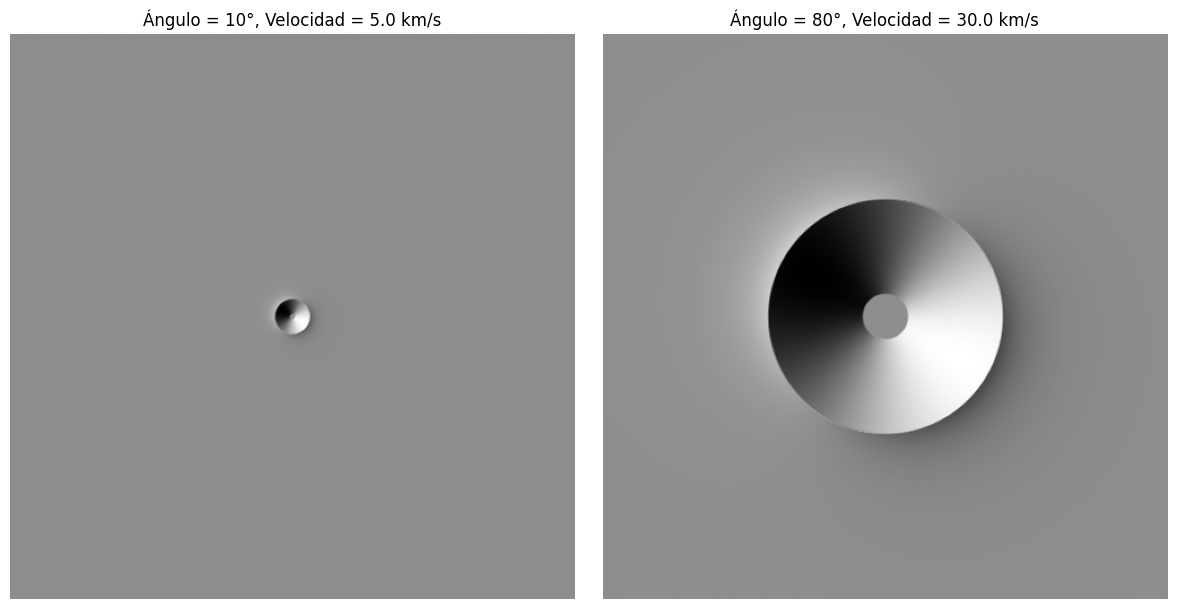

In [ ]:
#Morfología base
from matplotlib.colors import LightSource


morphology = Morphology.maker("simplemoon")
ls = LightSource(azdeg=300, altdeg=20)

#Parámetros visuales
gridsize = 500
extent = 1000
pix = 2 * extent / gridsize
x = np.linspace(-extent, extent, gridsize)
y = np.linspace(-extent, extent, gridsize)
xx, yy = np.meshgrid(x, y)
r = np.sqrt(xx**2 + yy**2)

#Índices para menor y mayor condiciones
idx_min = (0, 0)
idx_max = (-1, -1)

#Gráfica
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
condiciones = [idx_min, idx_max]
titulos = ["Ángulo = 10°, Velocidad = 5.0 km/s", "Ángulo = 80°, Velocidad = 30.0 km/s"]

radios_finales_pruebas = []

for i, idx in enumerate(condiciones):
    radio_final = resultados[25]['radios'][idx]   #Valor del radio final
    radios_finales_pruebas.append(radio_final)  # Guardar el radio final para futuras pruebas
    print('Radio final del cráter en el caso ', i +1 , ':', radio_final.round(3), 'metros.')  #Imprimir el radio final para verificar
    # Crear el cráter y calcular el perfil
    crater = Crater.maker(final_radius=radio_final)
    dem = morphology.crater_profile(crater, r) + morphology.ejecta_profile(crater, r)
    hillshade = ls.hillshade(dem, dx=pix, dy=pix, fraction=1)

    axs[i].imshow(hillshade, cmap="gray", vmin=0, vmax=1,
                  extent=(-extent, extent, -extent, extent))
    axs[i].axis("off")
    axs[i].set_title(titulos[i])

plt.tight_layout()
plt.show()


In [ ]:
radios_finales_pruebas

[np.float64(61.60821173082036), np.float64(415.579627340752)]

En esta última simulación se pueden ver los modelos de relieve generados por el impacto. A la izquierda, el cráter es pequeño y poco profundo, resultado de un impacto a baja velocidad y con un ángulo muy oblicuo (10°). En cambio, el cráter de la derecha es mucho más grande y definido, producto de un impacto más vertical (80°) y a alta velocidad. El contraste en las sombras permite identificar con claridad cómo cambia la morfología del cráter dependiendo de las condiciones del impacto: el primero apenas deja una marca, mientras que el segundo forma una estructura extensa y simétrica.



### Mapa de intensidad del cráter

Con el fin de visualizar las estructuras radiales características que se forman alrededor de los cráteres de impacto, a continuación se emplea un modelo de intensidad de rayos basado en el ejemplo "Plot the ray intensity map for a crater" de David Minton [4]. En este modelo, se simula la distribución espacial del material eyectado en forma de rayos, tal como se observa en muchos cráteres planetarios. El mapa representa la intensidad relativa de estos rayos, permitiendo analizar su patrón azimutal mediante una escala logarítmica de colores.

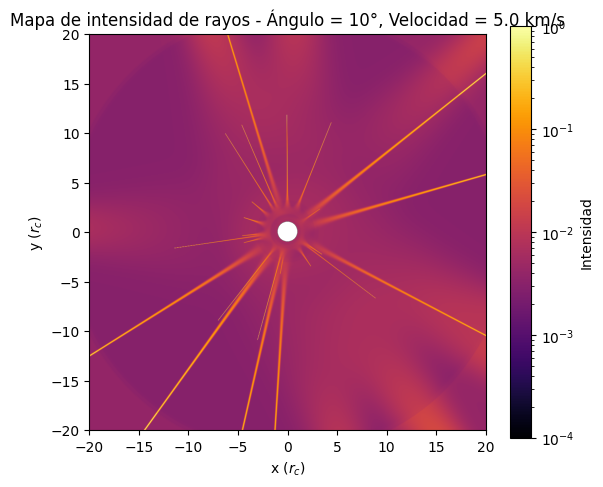

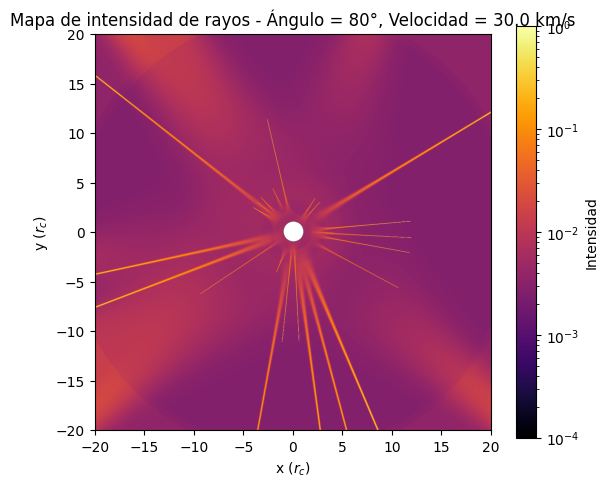

In [ ]:
# Mapa de intensidad de rayos

from matplotlib.colors import LogNorm


for radio_final, label in zip(radios_finales_pruebas, titulos):
    crater = Crater.maker(final_radius=radio_final)
    rc = crater.final_radius
    rmax = 20  # múltiplos del radio para ver la expansión de los rayos
    morphology.ejecta_truncation = rmax
    extent = rmax * rc
    grid_size = 1000

    x = np.linspace(-extent, extent, grid_size)
    y = np.linspace(-extent, extent, grid_size)
    xx, yy = np.meshgrid(x, y)

    r = np.sqrt(xx**2 + yy**2)
    theta = np.arctan2(yy, xx)

    r_flat = r.ravel()
    theta_flat = theta.ravel()
    intensity_flat = morphology.ray_intensity(crater, r_flat, theta_flat)
    intensity = intensity_flat.reshape(r.shape)

    fig, ax = plt.subplots(figsize=(6, 5))
    c = ax.imshow(
        intensity,
        norm=LogNorm(vmin=1e-4, vmax=intensity.max()),
        origin="lower",
        extent=[-rmax, rmax, -rmax, rmax],
        cmap="inferno",
    )
    ax.set_xlabel("x ($r_c$)")
    ax.set_ylabel("y ($r_c$)")
    ax.set_title(f"Mapa de intensidad de rayos - {label}")
    fig.colorbar(c, ax=ax, label="Intensidad")
    plt.tight_layout()
    plt.show()



En las simulaciones se observan las estructuras de rayos que se forman cuando un proyectil impacta sobre una superficie, dependiendo del ángulo y la velocidad. En el primer caso, con un ángulo bajo (10°) y velocidad lenta (5 km/s), los rayos salen de forma más alargada y concentrada hacia una dirección, lo que tiene sentido porque el impacto es más inclinado y el material tiende a salir arrastrado en esa misma dirección.

En cambio, en el segundo caso (80°, 30 km/s), el impacto es casi vertical y mucho más rápido, por lo que los rayos se distribuyen de manera más simétrica y hacia todas las direcciones. También se notan más extendidos, lo que se relaciona con la mayor energía del impacto.

Ambas simulaciones reflejan bien lo que se ha observado en cráteres reales, como los de la Luna: los impactos más verticales y rápidos tienden a generar patrones más circulares, mientras que los oblicuos forman rayos más irregulares.



### Perfil de cráter y eyección

Genera el perfil del cráter con radio y profundidad en 2D.
Celda de código rescatada y modificada de la sección de ejemplos de morfología [5].

De nuevo, se ilustra el contraste entre los resultados simulados para un cráter generado por un proyectil a $\theta = 10°$ y $v = 5 km/s$ y otro proyectil con $\theta = 80°$ y $v = 30 km/s$.

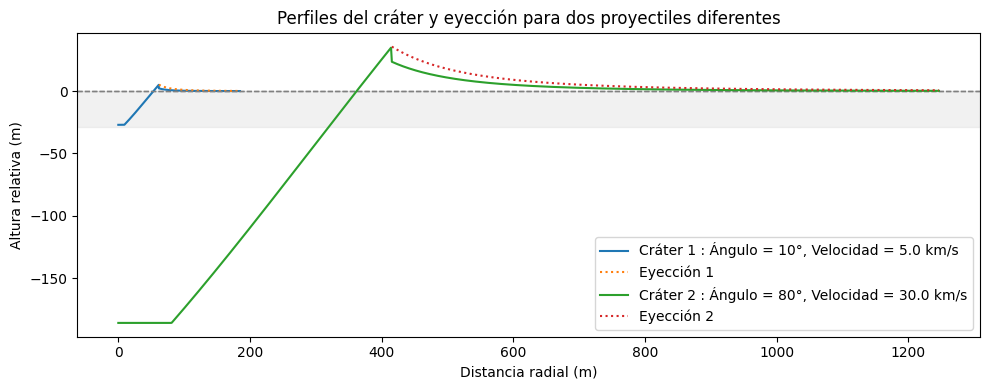

In [ ]:
# Perfiles del cráter y eyección


fig, ax = plt.subplots(figsize=(10, 4))
for i, (radio_final, label) in enumerate(zip(radios_finales_pruebas, titulos)):
    # Fondo gris claro para y < 0
    ax.axhspan(ymin=ax.get_ylim()[0], ymax=0, color='lightgrey', alpha=0.3, zorder=0)
    # Línea gris punteada en y = 0
    ax.axhline(0, color='grey', linestyle='--', linewidth=1)
    crater = Crater.maker(final_radius=radio_final)
    rc = crater.final_radius
    rvals = np.linspace(0, 3.0 * rc, 1000)
    hvals = morphology.crater_profile(crater, rvals)
    ejvals = morphology.ejecta_profile(crater, rvals)

    rej = rvals[ejvals > 0]
    ejvals = hvals[ejvals > 0] + ejvals[ejvals > 0]

    #color = colores[i]
    ax.plot(rvals, hvals, label=f"Cráter {i+1} : {label}")
    ax.plot(rej, ejvals, linestyle=':', label=f"Eyección {i+1}")

ax.set_xlabel("Distancia radial (m)")
ax.set_ylabel("Altura relativa (m)")
ax.legend()
plt.title("Perfiles del cráter y eyección para dos proyectiles diferentes")
plt.tight_layout()
plt.show()


Se nota claramente que el impacto más energético genera un cráter mucho más profundo y una eyección más extendida, como era de esperarse. También se observa que la morfología general del perfil se mantiene, pero la escala cambia significativamente. La visualización con fondo negro para el subsuelo y gris claro para el exterior ayuda a identificar mejor las zonas excavadas y elevadas tras el impacto.

## 4 Recreación a Escala del Experimento

Con el objetivo de contrastar los resultados obtenidos en la simulación de cráteres con una aplicación experimental de laboratorio a escala reducida, se diseñó un experimento físico que replicara el fenómeno de impacto sobre una superficie estratificada.

### Metodología experimental
Se utilizó un recipiente cuadrado plástico poco profundo, en el cual se dispusieron tres capas superpuestas de materiales de polvo/harina que simulan distintas composiciones del subsuelo planetario. La capa superior consistió en harina de trigo (blanca y de grano fino), seguida por una capa intermedia de colorante natural azul (destinada a resaltar visualmente el nivel intermedio), y una capa inferior de harina de maíz (amarilla, de textura más gruesa). Adicionalmente, entre la capa azul y la de harina de maíz se agregaron pequeñas pepitas negras, con el fin de simular material granular que pudiera ser expulsado o expuesto tras el impacto.

Se realizaron impactos verticales desde una altura aproximada de 90 cm utilizando dos proyectiles esféricos (canicas/pikis) de distinto tamaño: una de 15 mm y otra de 25 mm de diámetro. Cada impacto fue registrado fotográficamente y mediante video, disponibles en la carpeta de Drive compartida (ver referencia [2]).

Posteriormente, se realizaron nuevos ensayos utilizando fragmentos de roca para aproximar mejor la morfología irregular de asteroides reales, con el fin de observar diferencias en la geometría de los cráteres producidos.

### Resultados y análisis comparativo

Al comparar los resultados experimentales con la simulación computacional basada en el modelo de intensidad de rayos, se identificaron varias similitudes importantes:

- Relación entre profundidad del cráter y tamaño del proyectil: Se observó que la profundidad y tamaño del cráter aumentan proporcionalmente al diámetro del proyectil, en concordancia con las predicciones teóricas y con lo que se observa en cráteres reales, como los de la Luna.

- Exposición de capas inferiores: A mayor diámetro del proyectil, se incrementó la probabilidad de que el impacto alcanzara y expusiera las capas inferiores. En particular, los impactos de las piedras más grandes revelaron en mayor cantidad el polvo azul.

- Efectos de morfologías irregulares: Las pruebas con rocas evidenciaron cráteres más marcados, donde era más notable el polvo azul; probablemente se deba también a su masa mayor.

## Conclusiones


- El aumento progresivo en el radio y la profundidad del cráter con velocidades crecientes confirma la dependencia cuadrática de la energía cinética respecto a la velocidad. Esto implica que incluso incrementos moderados en la velocidad generan impactos mucho más energéticos, resultando en cráteres significativamente más grandes y profundos.

-  El ángulo de impacto modula la eficiencia con que la energía se transmite al suelo. Los impactos cercanos a 90° son los más eficientes en formar cráteres, tanto en profundidad como en extensión. Por el contrario, ángulos bajos (más oblicuos) producen cráteres más pequeños, dado que solo una fracción de la energía total—la componente vertical—actúa directamente sobre la superficie.

- El experimento permitió ver de forma clara cómo el tamaño del proyectil influye en el tamaño y la profundidad del cráter, tal como se observa en la simulación y en cuerpos reales, como la Luna. Además, al usar capas de diferentes colores, fue posible identificar cómo el impacto mezcla y expone las distintas capas del suelo. Las rocas con formas irregulares también generaron cráteres más desordenados, lo que se parece más a los impactos reales de asteroides. En general, la comparación con la simulación fue útil y permitió entender mejor cómo se forman los cráteres.

- Impactos más verticales y veloces generan cráteres mucho más grandes y definidos, tanto en profundidad como en el alcance del material eyectado. Esto se refleja en los perfiles y mapas, donde el cráter con ángulo de 80° y velocidad de 30 km/s muestra mayor simetría, rayos más intensos y una estructura más extensa.

- Impactos oblicuos y lentos producen cráteres pequeños y asimétricos, con menos material expulsado y rayos menos marcados. Por esto la importancia del ángulo y la velocidad en la forma final del cráter y la distribución del material eyectado.


## Referencias

[1] CraterMaker, CraterMaker: Estimate planetary impact crater dimensions, Read the Docs. [Online]. https://cratermaker.readthedocs.io/en/latest/

[2] Visuales de Montaje Experimental de Cráteres de Impacto - C. Planetarias, Carpeta Drive, https://drive.google.com/drive/folders/123PlMlYf5ohS8RQF5uoUH5zqCkwTADds?usp=sharing

[3] Minton, D. (2025). Create a shaded topographic representation of a crater [Project example]. En Cratermaker – Morphology Examples. Recuperado de Cratermaker: Plot the ray intensity map for a crater. https://cratermaker.readthedocs.io/en/latest/auto_examples/morphology/plot_shaded_crater.html#create-a-shaded-topographic-representation-of-a-crater

[4] Minton, D. (2025). Plot the ray intensity of a crater [Project example]. En Cratermaker – Morphology Examples. Recuperado de Cratermaker: Plot the ray intensity map for a crater. https://cratermaker.readthedocs.io/en/latest/auto_examples/morphology/plot_ray_intensity.html#plot-the-ray-intensity-map-for-a-crater

[5] Minton, D. (2025). Create a crater and ejecta profile with the “simplemoon” morphology model. En Cratermaker - Morphology Examples. Recuperado de Cratermaker: https://cratermaker.readthedocs.io/en/latest/auto_examples/morphology/plot_crater_profile.html#create-a-crater-and-ejecta-profile-with-the-simplemoon-morphology-model

[6] P. H. Schultz and D. E. Gault, “Prolonged global catastrophes from oblique impacts,” Geological Society of America Special Paper, vol. 247, pp. 239–261, 1990. doi: 10.1130/SPE247-p239.

[7] K. A. Holsapple, “The Scaling of Impact Processes in Planetary Sciences,” Annual Review of Earth and Planetary Sciences, vol. 21, pp. 333–373, 1993. [Online]. Disponible: https://www.lpi.usra.edu/lunar/tools/lunarcratercalc/theory.pdf